In [12]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.read_csv('hospital.csv', delimiter=",") #abrindo o arquivo
df #print da variável df

#pode existir problema na ausência de dados com algumas das funções, testar o comando dropna antes delas

,identificador,nome,idade,sexo,peso,manchas,temperatura,internacoes,estado,diagnostico
0,4201,Joao,28,M,67,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Saudavel
2,4039,Luiz,49,M,500,Espalhadas,38.0,2,RS,Doente
3,1920,Jose,18,M,43,Inexistentes,38.5,8,MG,Saudavel
4,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Doente
5,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Saudavel
6,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
7,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
8,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
9,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Saudavel


In [4]:
df.mean() #cálculo da mediana

C:\Users\GUSTAV~2\AppData\Local\Temp/ipykernel_6360/1258172375.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean() #cálculo da mediana


identificador    3028.090909
idade              24.909091
peso              104.636364
temperatura        43.854545
internacoes         3.181818
dtype: float64

In [5]:
x = df['sexo'].value_counts() #cálculo das quantidades dos tipos do atributo Sexo
x/len(df)  #cáculo das quantidades em relação ao conjunto completo (entre 0 e 1)

F    0.636364
M    0.363636
Name: sexo, dtype: float64

Text(0, 0.5, 'Peso')

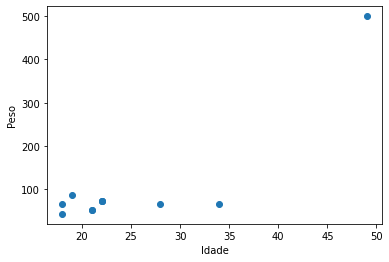

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df.idade, df.peso) #gráfico de correlação
plt.xlabel('Idade')
plt.ylabel('Peso')

In [9]:
df['idade'].mode() #cálculo da moda

0    22
dtype: int64

In [10]:
df['temperatura'].median()

38.5

In [11]:
df['temperatura'].mean() #cálculo da mediana

43.85454545454545

Text(0, 0.5, 'Valores')

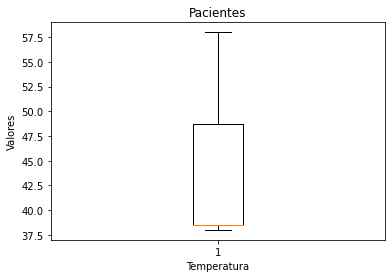

In [13]:
plt.boxplot(df['temperatura']) #gráfico de boxplot

plt.title('Pacientes')
plt.xlabel('Temperatura')
plt.ylabel('Valores')

In [14]:
df['temperatura'].var() #cálculo da variância

82.71272727272728

In [15]:
df['temperatura'].std() #cálculo do desvio padrão

9.09465377420863

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') #mapa de correlação

,identificador,idade,peso,temperatura,internacoes
identificador,1.000000,0.405642,0.267879,-0.452163,-0.777983
idade,0.405642,1.000000,0.864673,-0.230814,-0.403156
peso,0.267879,0.864673,1.000000,-0.177917,-0.180678
temperatura,-0.452163,-0.230814,-0.177917,1.000000,-0.036591
internacoes,-0.777983,-0.403156,-0.180678,-0.036591,1.000000


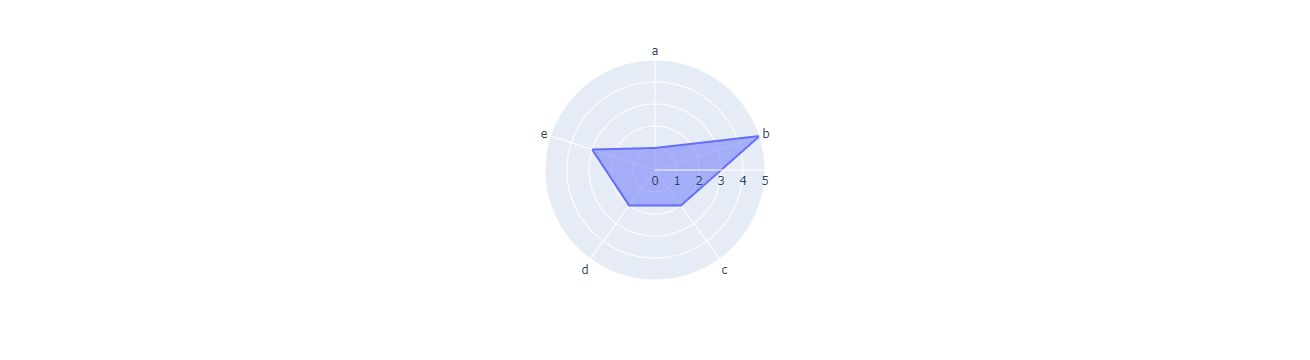

In [18]:
dg = pd.DataFrame(dict( #gerando dicionário
    r=[1,5,2,2,3],
    theta=['a','b','c','d','e']))
fig = px.line_polar(dg, r = 'r', theta = 'theta', line_close = True) #gráfico do tipo starplot
fig.update_traces(fill = 'toself')
fig.show()

In [19]:
df.drop(columns=['identificador','nome']) #excluir as colunas 'identificador' e 'nome'

,idade,sexo,peso,manchas,temperatura,internacoes,estado,diagnostico
0,28,M,67,Concentradas,38.0,2,SP,Doente
1,18,F,67,Inexistentes,39.5,4,MG,Saudavel
2,49,M,500,Espalhadas,38.0,2,RS,Doente
3,18,M,43,Inexistentes,38.5,8,MG,Saudavel
4,21,F,52,Uniformes,38.5,1,PE,Doente
5,21,F,52,Uniformes,38.5,1,PE,Saudavel
6,22,F,72,Inexistentes,58.0,3,RJ,Doente
7,22,F,72,Inexistentes,58.0,3,RJ,Doente
8,22,F,72,Inexistentes,58.0,3,RJ,Doente
9,19,F,87,Espalhadas,39.0,6,AM,Saudavel


In [20]:
df.loc[df['diagnostico'] == "Doente"].sample(n=4, random_state =2) #gerando uma amostra aleatória com 4 elementos

,identificador,nome,idade,sexo,peso,manchas,temperatura,internacoes,estado,diagnostico
7,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
2,4039,Luiz,49,M,500,Espalhadas,38.0,2,RS,Doente
6,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
4,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Doente


In [21]:
print('Valores faltantes:', df.isnull().sum()) #quantidade de valores faltantes para todos os atributos

Valores faltantes: identificador    0
nome             0
idade            0
sexo             0
peso             0
manchas          0
temperatura      0
internacoes      0
estado           0
diagnostico      0
dtype: int64


In [22]:
print('Valores duplicados:', df.duplicated()) #quantidade de valores duplicados para todos os atributos

Valores duplicados: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
dtype: bool


In [23]:
median = df['peso'].median()
df['peso'].fillna(median, inplace = True) #subtitui os elementos faltosos pela mediana
df

,identificador,nome,idade,sexo,peso,manchas,temperatura,internacoes,estado,diagnostico
0,4201,Joao,28,M,67,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Saudavel
2,4039,Luiz,49,M,500,Espalhadas,38.0,2,RS,Doente
3,1920,Jose,18,M,43,Inexistentes,38.5,8,MG,Saudavel
4,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Doente
5,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Saudavel
6,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
7,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
8,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
9,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Saudavel


In [24]:
df = df.dropna(how ='any') #elimina todas as linhas com dados ausentes
df

,identificador,nome,idade,sexo,peso,manchas,temperatura,internacoes,estado,diagnostico
0,4201,Joao,28,M,67,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Saudavel
2,4039,Luiz,49,M,500,Espalhadas,38.0,2,RS,Doente
3,1920,Jose,18,M,43,Inexistentes,38.5,8,MG,Saudavel
4,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Doente
5,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Saudavel
6,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
7,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
8,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
9,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Saudavel


In [25]:
df.drop_duplicates() #elimina todas as linhas com dados duplicados

,identificador,nome,idade,sexo,peso,manchas,temperatura,internacoes,estado,diagnostico
0,4201,Joao,28,M,67,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Saudavel
2,4039,Luiz,49,M,500,Espalhadas,38.0,2,RS,Doente
3,1920,Jose,18,M,43,Inexistentes,38.5,8,MG,Saudavel
4,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Doente
5,4340,Claudia,21,F,52,Uniformes,38.5,1,PE,Saudavel
6,2301,Ana,22,F,72,Inexistentes,58.0,3,RJ,Doente
9,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Saudavel
10,3027,Paulo,34,M,67,Uniformes,38.4,2,GO,Saudavel


In [27]:
le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])
        
print(df)

    identificador  nome  idade  sexo  peso  manchas  temperatura  internacoes  \
0            4201     2     28     1    67        0         38.0            2   
1            3217     5     18     0    67        2         39.5            4   
2            4039     4     49     1   500        1         38.0            2   
3            1920     3     18     1    43        2         38.5            8   
4            4340     1     21     0    52        3         38.5            1   
5            4340     1     21     0    52        3         38.5            1   
6            2301     0     22     0    72        2         58.0            3   
7            2301     0     22     0    72        2         58.0            3   
8            2301     0     22     0    72        2         58.0            3   
9            1322     6     19     0    87        1         39.0            6   
10           3027     7     34     1    67        3         38.4            2   

    estado  diagnostico  
0

In [28]:
rs = RobustScaler() #normalização dos dados e para isso remove a mediana e dimensiona os dados de acordo com o intervalo quantil
X = rs.fit_transform(df)

print(X)

[[ 6.45409566e-01  0.00000000e+00  1.20000000e+00  1.00000000e+00
   0.00000000e+00 -2.00000000e+00 -4.85436893e-02 -6.66666667e-01
   1.50000000e+00  0.00000000e+00]
 [ 1.04452996e-01  7.50000000e-01 -8.00000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.70873786e-02  6.66666667e-01
  -5.00000000e-01  1.00000000e+00]
 [ 5.56349643e-01  5.00000000e-01  5.40000000e+00  1.00000000e+00
   3.46400000e+01 -1.00000000e+00 -4.85436893e-02 -6.66666667e-01
   1.00000000e+00  0.00000000e+00]
 [-6.08576141e-01  2.50000000e-01 -8.00000000e-01  1.00000000e+00
  -1.92000000e+00  0.00000000e+00  0.00000000e+00  3.33333333e+00
  -5.00000000e-01  1.00000000e+00]
 [ 7.21825179e-01 -2.50000000e-01 -2.00000000e-01  0.00000000e+00
  -1.20000000e+00  1.00000000e+00  0.00000000e+00 -1.33333333e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.21825179e-01 -2.50000000e-01 -2.00000000e-01  0.00000000e+00
  -1.20000000e+00  1.00000000e+00  0.00000000e+00 -1.33333333e+00
   0.00000000e+00  1.00000000e+00

In [29]:
x_array = np.array(df['peso']) 
normalized_X = preprocessing.normalize([x_array]) #normaliza os dados do atributo entre 0 e 1

normalized_X

array([[0.1235992 , 0.1235992 , 0.92238207, 0.07932486, 0.09592774,
        0.09592774, 0.13282302, 0.13282302, 0.13282302, 0.16049448,
        0.1235992 ]])

In [30]:
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1])
y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])

Z = np.c_[x-x.mean(), y - y.mean()] #concatena os vetores agora centralizados
df = pd.DataFrame(Z, columns=['x','y'])
df.index.name = 'Medidas'
df.T #transposta da matriz

Medidas,0,1,2,3,4,5,6,7,8,9
x,0.69,-1.31,0.39,0.09,1.29,0.49,0.19,-0.81,-0.31,-0.71
y,0.49,-1.21,0.99,0.29,1.09,0.79,-0.31,-0.81,-0.31,-1.01


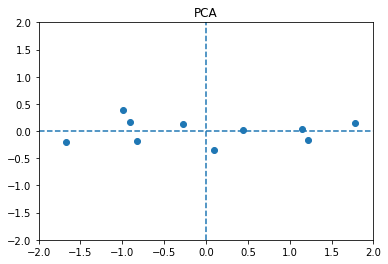

In [31]:
pca = PCA(n_components = 2, copy = True) #executando o PCA
X = pca.fit_transform(Z)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.axhline(linestyle='dashed') #linha no eixo x
ax.axvline(linestyle='dashed') #linha no eixo y
_ = ax.set_title("PCA")